In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from random import randint
from PIL import Image
from math import sqrt
from math import sin
from math import cos
from math import pi
from math import floor
from math import ceil
import operator #for sorting array of tuples
from time import time

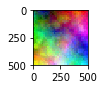

In [15]:
img = cv2.imread('som-ic2.jpg')
#convert to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(1,1))
plt.imshow(img_rgb)

In [27]:
dist = int(500/32)
col_arr = []
#create 2-dimensional array of colors from som-image
for x in range(0, 32):
    yArr = []
    for y in range(0, 32):
        yArr.append(img_rgb[x*dist][y*dist])
    col_arr.append(yArr)

In [25]:
#generate (random) full binary tree
class Node:
    #leftChild: None or new Node
    #rightChild: None or new Node
    #ar – aspect ratio: calculated from leftChild.ar and rightChild.ar
    #sliceDirection: "V"(0) or "H"(1) or None, when it's a leaf
    def __init__(self, numOfLeaves, aspectRatio, parent, width, height, position):        
        self.leftChild = None
        self.rightChild = None
        self.sliceDirection = None
        self.aspectRatio = aspectRatio
        self.image = None
        self.parent = parent
        self.width = width
        self.height = height
        self.position = position
        
        if(numOfLeaves == 1): #this node is a leaf
            #select image/rect from rects, that best fits the aspectRatio
            self.image = findBestImg(aspectRatio)
            
        #if(numOfLeaves == 2): #this node is inner node with two leaves
         
        if(numOfLeaves >= 2): #this node is an inner node with two children
            self.sliceDirection = randint(0,1) #random int 0 for "V", or 1 for "H"
            if(self.sliceDirection == 0): #vertical slice
                childWidth = height * (aspectRatio/2)
                childHeight = height
                leftPos = position
                rightPos = ((position[0] + width - childWidth), position[1])
                self.leftChild = Node(floor(numOfLeaves/2), aspectRatio/2, self, childWidth, childHeight, leftPos)
                self.rightChild = Node(ceil(numOfLeaves/2), aspectRatio/2, self, childWidth, childHeight, rightPos)
            else: #horizontal slice
                childWidth = width
                childHeight = width / (aspectRatio*2)
                leftPos = position
                rightPos = (position[0], (position[1] + height - childHeight))
                self.leftChild = Node(floor(numOfLeaves/2), aspectRatio*2, self, childWidth, childHeight, leftPos)
                self.rightChild = Node(ceil(numOfLeaves/2), aspectRatio*2, self, childWidth, childHeight, rightPos)

In [26]:
def findBestImg(aspectRatio):
    unassignedPos = firstUnassignedPos()
    diff = abs(aspectRatio - ((rects[unassignedPos][2])/(rects[unassignedPos][3])))
    bestImgPos = unassignedPos
    
    for i in range(unassignedPos + 1, len(rects)):
        if(rects[i][5] == False): #rect not assigned yet
            ar_rect = (rects[i][2])/(rects[i][3]) #width/height
            tmpDiff = abs(aspectRatio - ar_rect)
            if(tmpDiff < diff):
                diff = tmpDiff
                bestImgPos = i
    
    rects[bestImgPos] = (rects[bestImgPos][0], rects[bestImgPos][1], rects[bestImgPos][2], rects[bestImgPos][3], rects[bestImgPos][4], True)
    return rects[bestImgPos] #format: (x, y, width, height, (r,g,b, 0.6), assigned)
    

In [45]:
def firstUnassignedPos():
    for i in range(0, len(rects)):
        if(rects[i][5] == False):
            return i
    print("all positions appear to be assigned")
    return -1

In [53]:
all_width = 0
all_height = 0
rects = []
subsetSize = 3 #originally subsetSize = 32
for x in range(0, subsetSize):
    for y in range(0, subsetSize):
        rand_width = randint(30,100)
        rand_height = randint(30,100)
        all_width = all_width + rand_width
        all_height = all_height + rand_height
        r = float(col_arr[x][y][0]/255)
        g = float(col_arr[x][y][1]/255)
        b = float(col_arr[x][y][2]/255)
        assigned = False
        rects.append( (x*50, y*50, rand_width, rand_height, (r,g,b, 0.6), assigned) ) #alpha 0.6        

print(rects[0]) 

(0, 0, 31, 66, (0.0, 0.47058823529411764, 0.19607843137254902, 0.6), False)


all_height:  603 , all_width:  553


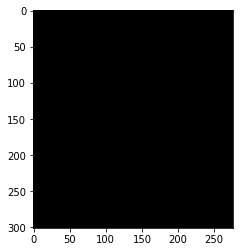

In [54]:
#create blank (black) image
blank = np.zeros( (int(all_height/2), int(all_width/2), 3), np.uint8 )
blank_img = Image.fromarray(blank, 'RGB')
#Image.fromarray(rgb_pixels, 'RGB')
#plt.figure(1)
#plt.imshow(blank_img)

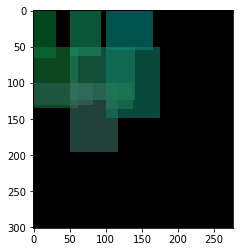

In [55]:
#create figure and axes
fig,ax = plt.subplots(1)
ax.imshow(blank_img)

for i in range(0, len(rects)):
    posX = rects[i][0]
    posY = rects[i][1]
    width = rects[i][2]
    height = rects[i][3]
    color = rects[i][4]#[0:3]
    tmpRect = patches.Rectangle((posX, posY), width, height, linewidth=0, edgecolor=color, facecolor=color)
    ax.add_patch(tmpRect)
    
plt.imshow(blank_img)

In [56]:
# set expected ratio ar_exp
ar_exp = (2/3)
# set number of associated images N
numberOfImages = subsetSize*subsetSize
# create the tree root node with numberOfImages, which creates the tree recursively
root = Node(numberOfImages, ar_exp, None, 1000, 1500, (0,0)) #None because root has no parent

In [60]:
#TODO display tree structure
blank2 = np.zeros( (1500, 1000, 3), np.uint8 )
blank2_img = Image.fromarray(blank2, 'RGB')
#plt.imshow(blank2_img)

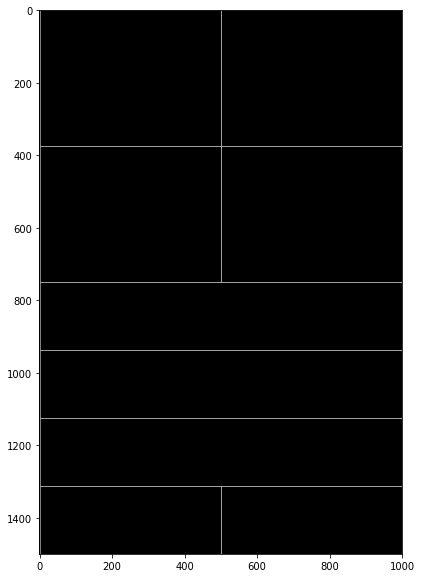

In [61]:
#create figure and axes
fig,ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(blank2_img)

#build image from tree structure
#traverse tree 
def traverseTree(node):
    treeRects = []
    if(node.leftChild == None and node.rightChild == None): #leaf
        #display
        rect = node.image
        position = node.position
        width = rect[2]
        width = node.width
        height = rect[3]
        height = node.height
        #color = rect[4][0:3]
        tmpRect = patches.Rectangle(position, width, height, linewidth=0.5, edgecolor=(1,1,1), facecolor=(0,0,0))
        ax2.add_patch(tmpRect)
        #print(rect)
    else:
        traverseTree(node.leftChild)
        traverseTree(node.rightChild)

traverseTree(root)

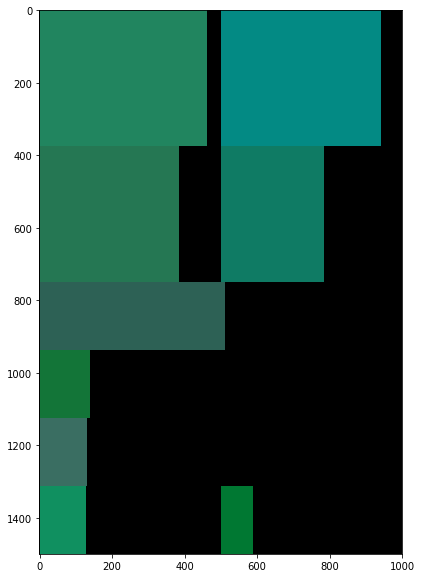

In [62]:
#create figure and axes
fig,ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(blank2_img)

#build image from tree structure
#traverse tree 
def traverseTree(node):
    treeRects = []
    if(node.leftChild == None and node.rightChild == None): #leaf
        #display
        rect = node.image
        position = node.position
        width = rect[2] 
        height = rect[3]
        if(node.height > node.width): # rect_height is bigger than rect_width
            height = (height/width) * node.width
            width = node.width
        else: # rect_width is same or bigger than rect_height
            width = (width/height) * node.height
            height = node.height
        color = rect[4][0:3] #add or remove transparency to see overlapping
        tmpRect = patches.Rectangle(position, width, height, linewidth=0, edgecolor=color, facecolor=color)
        ax2.add_patch(tmpRect)
        #print("width: ", width, ", height: ", height)
    else:
        traverseTree(node.leftChild)
        traverseTree(node.rightChild)

traverseTree(root)

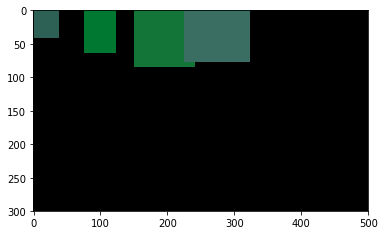

In [36]:
#create figure and axes
fig,ax2 = plt.subplots(1)
ax2.imshow(blank2_img)

#build image from tree structure
#traverse tree 
def traverseTree(node):
    treeRects = []
    if(node.leftChild == None and node.rightChild == None): #leaf
        #display
        rect = node.image
        position = node.position
        width = rect[2] 
        height = rect[3]
        color = rect[4][0:3] #add or remove transparency to see overlapping
        tmpRect = patches.Rectangle(position, width, height, linewidth=0, edgecolor=color, facecolor=color)
        ax2.add_patch(tmpRect)
    else:
        traverseTree(node.leftChild)
        traverseTree(node.rightChild)

traverseTree(root)